In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wineuci/Wine.csv


# **1. fetching dataset**

In [98]:
wine=pd.read_csv('../input/wineuci/Wine.csv',header=None)
wine.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **2. Naming columns**

In [99]:
wine.columns=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']       

# **3. Dataset**

In [100]:
wine

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 3. Elbow Meathod to find number of Clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

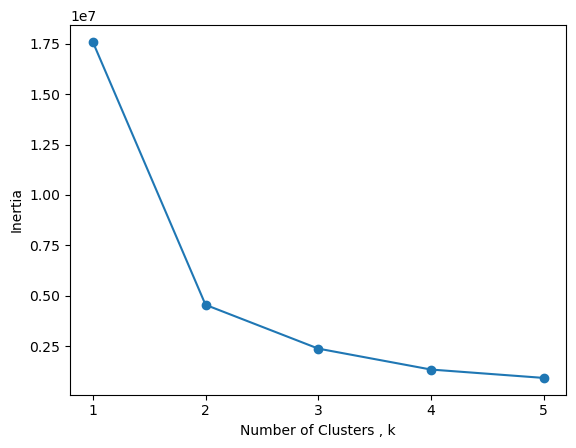

In [101]:
ks=range(1,6)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine)
    inertias.append(model.inertia_)

plt.plot(ks,inertias,'-o')
plt.xlabel('Number of Clusters , k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

# ** 4.dropping labels or class**

In [102]:
wine_c=wine['Class']
wine.drop('Class', axis=1,inplace= True)

# **5. DATA FRAME**

In [135]:
df=pd.DataFrame({'labels': labels , 'class':wine_c})
ct=pd.crosstab(df['labels'],df['class'])

In [136]:
ct

class,1,2,3
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


# **6. Plot the data points and centroids 'OD280' VS 'Proline**


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


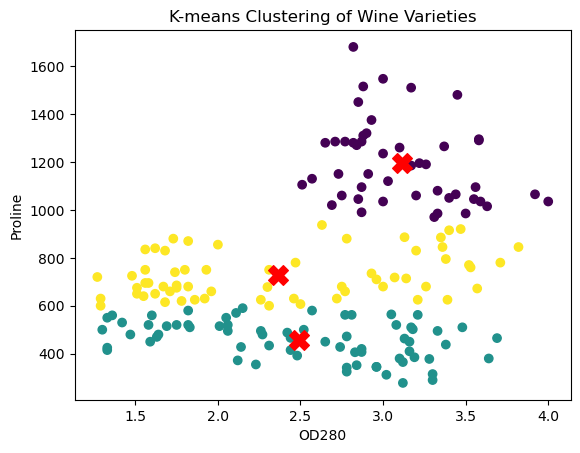

In [137]:

# Select the features for clustering
features = wine[['OD280', 'Proline']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming there are 3 wine varieties
kmeans.fit(features)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(features['OD280'], features['Proline'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.title('K-means Clustering of Wine Varieties')
plt.show()

# **7. Plot the data points and centroids 'Alcohol' VS 'Proline**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


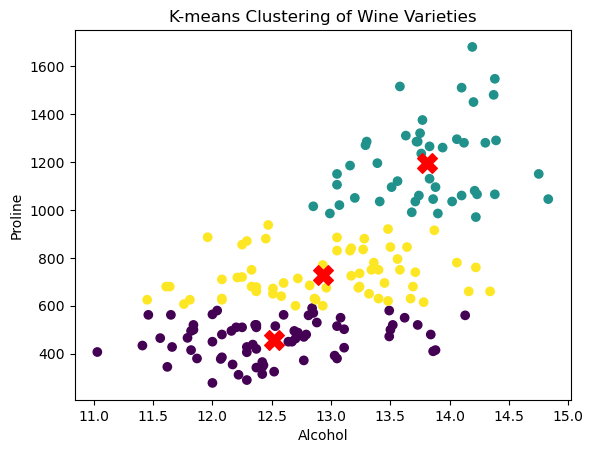

In [117]:
# Select the features for clustering
features = wine[['Alcohol', 'Proline']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming there are 3 wine varieties
kmeans.fit(features)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(features['Alcohol'], features['Proline'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('K-means Clustering of Wine Varieties')
plt.show()

# **8. Plot the data points and centroids 'Malic_acid' VS 'Proline**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


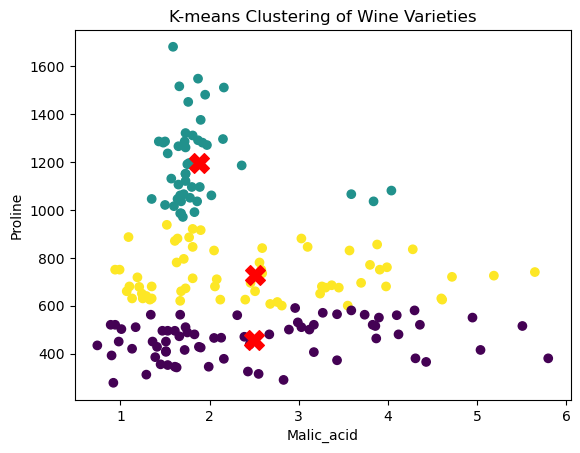

In [118]:
# Select the features for clustering
features = wine[['Malic_acid', 'Proline']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming there are 3 wine varieties
kmeans.fit(features)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(features['Malic_acid'], features['Proline'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('Malic_acid')
plt.ylabel('Proline')
plt.title('K-means Clustering of Wine Varieties')
plt.show()

# **9. Plot the data points and centroids 'Malic_acid' VS 'Magnesium'**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


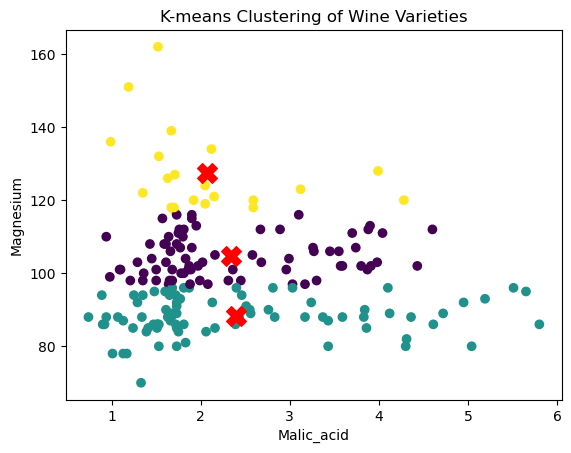

In [121]:
# Select the features for clustering
features = wine[['Malic_acid', 'Magnesium']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming there are 3 wine varieties
kmeans.fit(features)

# Get the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(features['Malic_acid'], features['Magnesium'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('Malic_acid')
plt.ylabel('Magnesium')
plt.title('K-means Clustering of Wine Varieties')
plt.show()

# **9.SCALING WITHOUT PIPELINE**



In [123]:
scaled_wine=scaler.fit_transform(wine)
scaled_wine.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [128]:
scaled_wine=scaler.fit_transform(wine)
scaled_wine.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [129]:
scaled_wine=pd.DataFrame(scaled_wine)
scaled_wine.columns=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


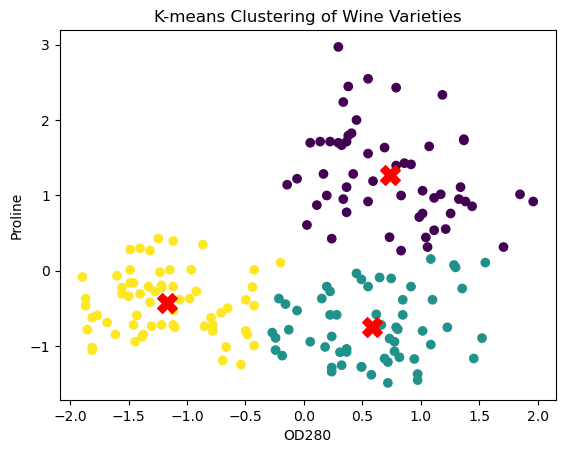

In [132]:
scaled_features = scaled_wine[['OD280', 'Proline']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming there are 3 wine varieties
kmeans.fit(scaled_features)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(scaled_features['OD280'], scaled_features['Proline'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.title('K-means Clustering of Wine Varieties')
plt.show()